In [226]:
import numpy as np 
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt 
from matplotlib import style 
from scipy.ndimage.filters import gaussian_filter1d
from scipy.constants import c,h,k 
style.use("default")
import math

In [227]:
def convert(x): #converts from nanometer to meter
    return x*(1e-9)

#Planck's blackbody radiation formula 
def B(wavelength, T): 
    return (2*h*(c**2))/(convert(wavelength)**5*(np.exp(h*c/(convert(wavelength)*k*T))-1))

#wavelength range 
wavelength = np.linspace(380,750) #in nanometers #visible spectrum
T = np.arange(1000,12001,100)

In [228]:
CIE = np.loadtxt("cie-cmf.txt", float)
wav_CIE = CIE[:,0]
xbar = CIE[:,1]
ybar = CIE[:,2]
zbar = CIE[:,3]

wav_new = np.linspace(380,750)
xbar_new = np.interp(wav_new, wav_CIE, xbar)
ybar_new = np.interp(wav_new, wav_CIE, ybar)
zbar_new = np.interp(wav_new, wav_CIE, zbar)

cie1 = np.loadtxt("cie-cmf.txt", float)
wavl1 = cie1[:,0]
xbar1 = cie1[:,1]
ybar1 = cie1[:,2]
zbar1 = cie1[:,3]
I1 = xbar1+ybar1+zbar1
x1 = xbar1/I1
y1 = ybar1/I1

[0.6525636463773752, 0.5266033015484344, 0.4368971391460087, 0.380428283105988, 0.3451027349255433, 0.322092326439881, 0.30638741029606814, 0.2952038505969483, 0.2869445251322218, 0.2806539278868802]
[0.3446453519806677, 0.4133268115784188, 0.4040727277006569, 0.3767471947400005, 0.35161736706389984, 0.3317721354660433, 0.3165396007855535, 0.30479918966950154, 0.29562316119357784, 0.28833235257392764]
[0.0027910016419571138, 0.06006988687314685, 0.15903013315333442, 0.2428245221540115, 0.3032798980105568, 0.34613553809407577, 0.3770729889183783, 0.39999695973355015, 0.41743231367420036, 0.4310137195391921]


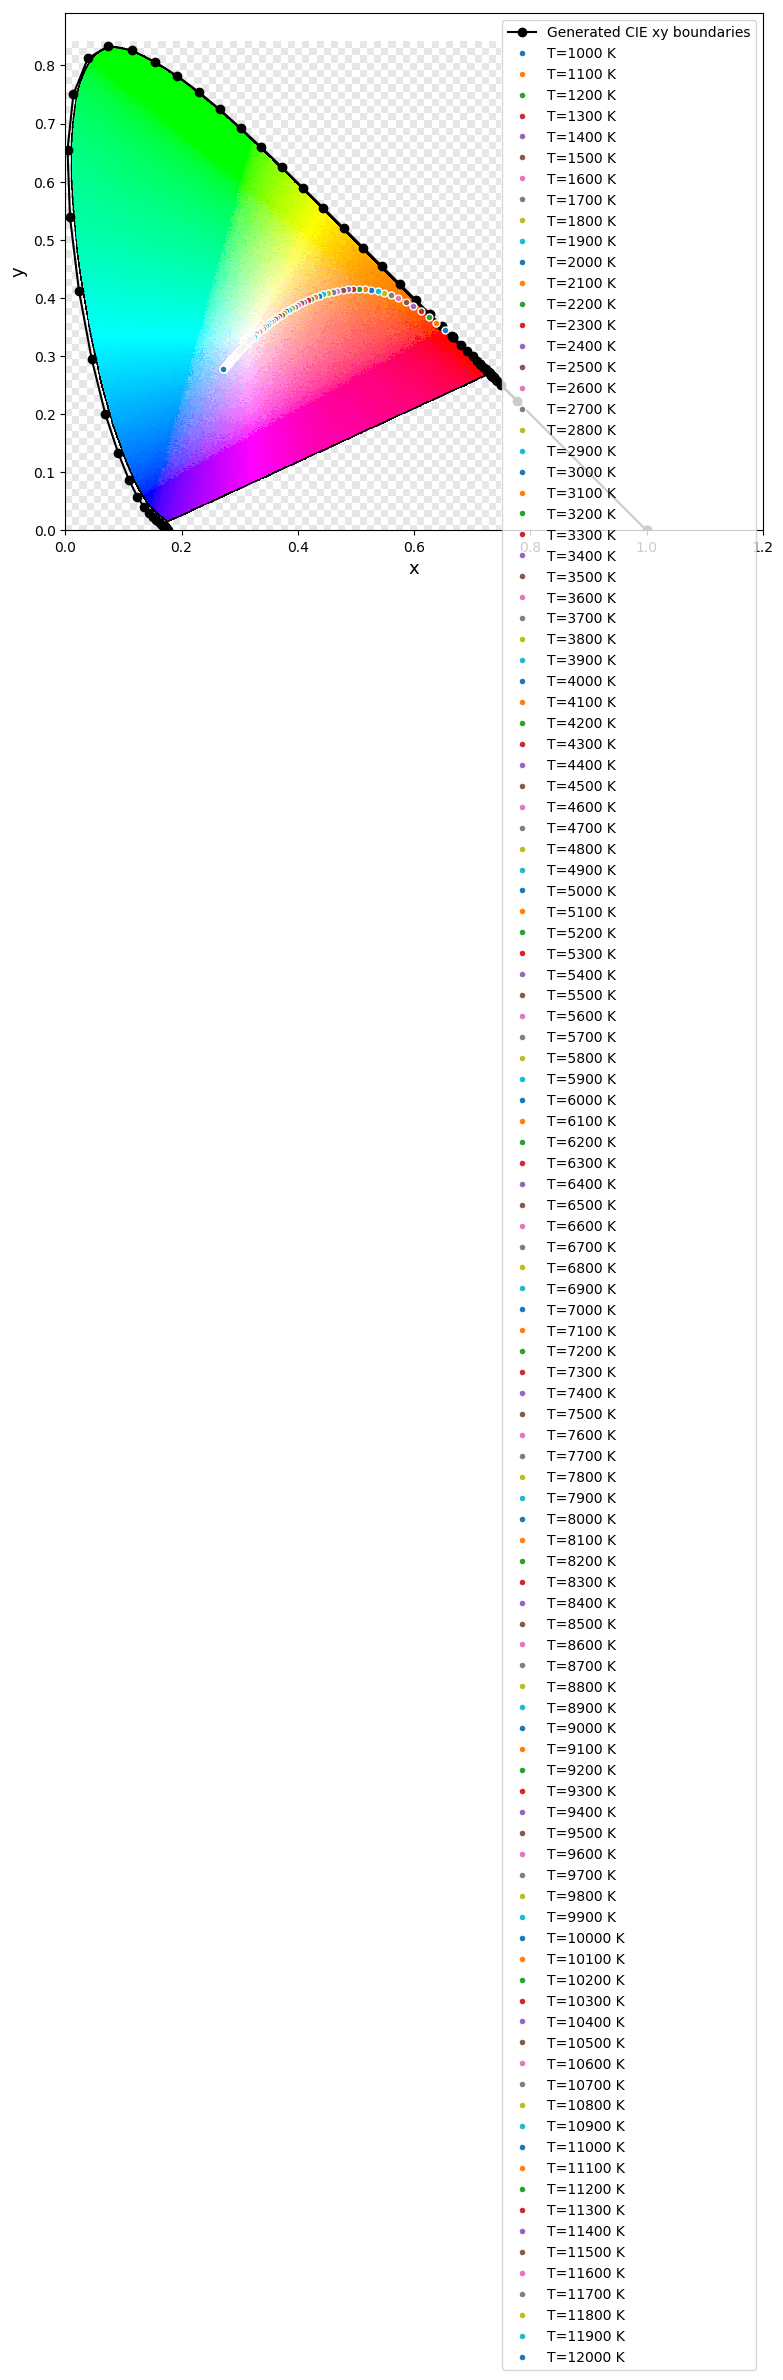

In [229]:
plt.figure(figsize=(9,9))
xlist = []
ylist = []
zlist = []
Xlist=[]
Ylist=[]
Zlist=[]
colorspace = plt.imread("light-cie-1931-color-space-srgb-chromaticity-light-png-clip-art.png")
plt.imshow(colorspace, extent=(0.000, 0.7499,0.0000,0.841))
plt.plot(x1,y1, "ko-", label ="Generated CIE xy boundaries")
for i in T:
    X = np.trapz((B(wavelength,i)*xbar_new),wavelength)
    Y = np.trapz((B(wavelength,i)*ybar_new),wavelength)
    Z = np.trapz((B(wavelength,i)*zbar_new),wavelength)
   
    I = X + Y + Z 
    x = X/I
    y = Y/I
    z = 1-x-y
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    
    Xlist.append(X)
    Ylist.append(Y)
    Zlist.append(Z)
    
    plt.plot(x,y, "o", label = "T=%.0f K" % i, marker='o',markeredgecolor='white', markersize=5)
    plt.legend(loc = "upper right")
    plt.xlim(0.0,1.2)
    plt.ylim(0.0,0.89)
    plt.xlabel("x", fontsize = 13)
    plt.ylabel("y", fontsize = 13)
  

    
x2list = []
y2list = []
z2list = []
for i in range(1000, 10001, 1000):
    X2 = np.trapz((B(wavelength,i)*xbar_new),wavelength)
    Y2 = np.trapz((B(wavelength,i)*ybar_new),wavelength)
    Z2 = np.trapz((B(wavelength,i)*zbar_new),wavelength)
    I = X2 + Y2 + Z2 
    x2 = X2/I
    y2 = Y2/I
    z2 = 1-x2-y2
    x2list.append(x2)
    y2list.append(y2)
    z2list.append(z2)

print(x2list)
print(y2list)
print(z2list)



m1=[i*3.2404542 for i in Xlist]
m2=[j*(-1.5371385) for j in Ylist] 
m3=[k*(-0.4985314) for k in Zlist]
R=m1+m2+m3 # list conc -> red coordinate
Rmax=max(R)

m4=[i*(-0.9692660) for i in xlist]
m5=[j*1.8760108 for j in ylist] 
m6=[k*0.0415560 for k in zlist]
G=m4+m5+m6 # green coordinate
Gmax=max(G)

m7=[i*0.0556434 for i in xlist]
m8=[j*(-0.2040259) for j in ylist] 
m9=[k*1.0572252 for k in zlist]
B=m7+m8+m9
Bmax=max(B)

maxRGB=max(Rmax,Bmax,Gmax)
R  = np.divide(R, maxRGB)
G  = np.divide(G, maxRGB)
B  = np.divide(B, maxRGB)

#R  = np.divide(R, Rmax)
#G  = np.divide(G, Gmax)
#B  = np.divide(B, Bmax)
print(R)
print(G)
print(B)
 #[x+1 if x >= 45 else x+5 for x in l]
    
Rgamma = [i for i in R if i < 0.0031308]
Rgamma_new=[i*12.92 for i in Rgamma]
Rgamma2 = [i for i in R if (i >= 0.0031308)]
Rgamma_new2=[(pow(i, 1.0 / 2.4)*1.055 -0.055) for i in Rgamma2]
Rgamma_f = Rgamma_new+Rgamma_new2
#print(Rgamma_f)
#Rgamma_f = [ round(elem, 3) for elem in Rgamma_f ]
Rgamma_f2=[0 for i in Rgamma_f if (i <0)]
Rgamma_f3=[1 for i in Rgamma_f if (i >1)]
Rgamma_f4 =[i for i in Rgamma_f if (0<=i<=1)]
Rgamma_final=Rgamma_f2+Rgamma_f3+Rgamma_f4
#Rgamma_final = [ round(elem, 4) for elem in Rgamma_final ]
Rgamma_final = [ round(elem, 3) for elem in Rgamma_final]
print(Rgamma_final)

Ggamma = [i for i in G if i < 0.0031308]
Ggamma_new=[i*12.92 for i in Ggamma]
Ggamma2 = [i for i in G if (i >= 0.0031308)]
Ggamma_new2=[(pow(i, 1.0 / 2.4)*1.055 -0.055) for i in Ggamma2]
#print(Ggamma_new2)
Ggamma_f = Ggamma_new+Ggamma_new2
#Ggamma_f = [ round(elem, 3) for elem in Ggamma_f]
#print(Ggamma_f)
Ggamma_f2=[0 for i in Ggamma_f if (i <0)]
Ggamma_f3=[1 for i in Ggamma_f if (i >1)]
Ggamma_f4 =[i for i in Ggamma_f if (0<=i<=1)]
Ggamma_final=Ggamma_f2+Ggamma_f3+Ggamma_f4
Ggamma_final = [ round(elem, 3) for elem in Ggamma_final]
print(Ggamma_final)

Bgamma = [i for i in B if i < 0.0031308]
Bgamma_new=[i*12.92 for i in Bgamma]
Bgamma2 = [i for i in B if (i >= 0.0031308)]
Bgamma_new2=[(pow(i, 1.0 / 2.4)*1.055 -0.055) for i in Bgamma2]
#print(Bgamma_new2)
Bgamma_f = Bgamma_new+Bgamma_new2
#Bgamma_f = [ round(elem, 3) for elem in Bgamma_f]
#print(Rgamma_f)
Bgamma_f2=[0 for i in Bgamma_f if (i <0 or i<=-0.0)]
Bgamma_f3=[1 for i in Bgamma_f if (i >1)]
Bgamma_f4 =[i for i in Bgamma_f if (0<=i<=1)]
Bgamma_final=Bgamma_f2+Bgamma_f3+Bgamma_f4
Bgamma_final = [ round(elem, 3) for elem in Bgamma_final]
print(Bgamma_final)
Rgamma_final=[i*255 for i in Rgamma_final]
Bgamma_final=[i*255 for i in Bgamma_final]
Ggamma_final=[i*255 for i in Ggamma_final]


a=np.column_stack((Rgamma_final, Ggamma_final, Bgamma_final))
print(a)
img = np.array(a).reshape((1, len(a), 3))
plt.imshow(img, extent=[1000,12000, 200, 1], aspect='auto')
plt.show()

